In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
IMG_SIZE = 224
seed = 42

NUM_CLASSES = 3
BATCH_SIZE = 32
EPOCHS = 50

CLASSES = ['Downy_mildew','Healthy_leaves','Powdery_mildew']

In [4]:
TRAIN_DATADIR = '/content/drive/MyDrive/dataset_1/train'
TEST_DATADIR = '/content/drive/MyDrive/dataset_1/test'
VAL_DATADIR = '/content/drive/MyDrive/dataset_1/val'

In [5]:
import cv2

training_data = []

def creating_training_data():
  for category in CLASSES:
    path = os.path.join(TRAIN_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [6]:
creating_training_data()
print(len(training_data))

2686


In [7]:
testing_data = []

def creating_testing_data():
  for category in CLASSES:
    path = os.path.join(TEST_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array, class_num])
      except Exception as e:
        pass

In [8]:
creating_testing_data()
print(len(testing_data))

749


In [9]:
validating_data = []

def creating_validation_data():
  for category in CLASSES:
    path = os.path.join(VAL_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        validating_data.append([new_array, class_num])
      except Exception as e:
        pass

In [10]:
creating_validation_data()
print(len(validating_data))

297


In [11]:
X_training_data = []
y_training_data = []

for classes, label in training_data:
  X_training_data.append(classes)
  y_training_data.append(label)

In [12]:
X_testing_data = []
y_testing_data = []

for classes, label in testing_data:
  X_testing_data.append(classes)
  y_testing_data.append(label)

In [13]:
X_validation_data = []
y_validation_data = []

for classes, label in validating_data:
  X_validation_data.append(classes)
  y_validation_data.append(label)

In [14]:
train_x = np.array(X_training_data)
test_x = np.array(X_testing_data)

In [15]:
train_y = np.array(y_training_data)
test_y = np.array(y_testing_data)

In [16]:
valid_x = np.array(X_validation_data)
valid_y = np.array(y_validation_data)

In [17]:
print("X_train shape:", train_x.shape)
print("y_train shape:", train_y.shape)
print("X_test shape:", test_x.shape)
print("y_test shape:", test_y.shape)
print("X_validation shape:", valid_x.shape)
print("y_validation shape:", valid_y.shape)

X_train shape: (2686, 224, 224, 3)
y_train shape: (2686,)
X_test shape: (749, 224, 224, 3)
y_test shape: (749,)
X_validation shape: (297, 224, 224, 3)
y_validation shape: (297,)


In [18]:
x_train = train_x
y_train = train_y

x_test = test_x
y_test = test_y

x_val = valid_x
y_val = valid_y

In [19]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("X_validation shape:", x_val.shape)
print("y_validation shape:", y_val.shape)

X_train shape: (2686, 224, 224, 3)
y_train shape: (2686,)
X_test shape: (749, 224, 224, 3)
y_test shape: (749,)
X_validation shape: (297, 224, 224, 3)
y_validation shape: (297,)


In [20]:
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

x_val = x_val.astype('float32')
x_val /= 255

In [21]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes = NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = NUM_CLASSES)

In [22]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print(x_val.shape)
print(y_val.shape)

(2686, 224, 224, 3)
(2686, 3)
(749, 224, 224, 3)
(749, 3)
(297, 224, 224, 3)
(297, 3)


In [23]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import random

tuning_parameters = {
    "learning_rate": [0.001, 0.01],
    "batch_size": [64, 128],
    "epochs": [35],
    "dropout_rate": [0.3, 0.4]
}

def build_cnn_model(dropout_probability, learning_rate_value):
    cnn_model = Sequential()

    cnn_model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(BatchNormalization())

    cnn_model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(BatchNormalization())

    cnn_model.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(BatchNormalization())

    cnn_model.add(Flatten())

    cnn_model.add(Dense(512))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Activation('relu'))
    cnn_model.add(Dropout(dropout_probability))

    cnn_model.add(Dense(256))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Activation('relu'))
    cnn_model.add(Dropout(0.2))

    cnn_model.add(Dense(NUM_CLASSES))
    cnn_model.add(Activation('softmax'))

    cnn_model.compile(
        optimizer=Adam(learning_rate=learning_rate_value),
        loss="categorical_crossentropy",
        metrics=["accuracy", Precision(), Recall()]
    )
    return cnn_model


In [ ]:
def perform_random_search(parameter_space, train_features, train_labels, test_features, test_labels, search_iterations=10):
    optimal_accuracy = 0
    optimal_parameters = {}

    for attempt in range(search_iterations):
        sampled_parameters = {key: random.choice(values) for key, values in parameter_space.items()}
        print(f"Deneme {attempt + 1}: {sampled_parameters}")

        trial_model = build_cnn_model(
            dropout_probability=sampled_parameters["dropout_rate"],
            learning_rate_value=sampled_parameters["learning_rate"]
        )

        training_history = trial_model.fit(
            train_features, train_labels,
            batch_size=sampled_parameters["batch_size"],
            epochs=sampled_parameters["epochs"],
            validation_data=(test_features, test_labels),
            verbose=1
        )

        validation_accuracy = max(training_history.history["val_accuracy"])
        print(f"Doğrulama Doğruluğu: {validation_accuracy}")

        if validation_accuracy > optimal_accuracy:
            optimal_accuracy = validation_accuracy
            optimal_parameters = sampled_parameters

    print("En iyi sonuç:")
    print(f"Doğruluk: {optimal_accuracy}")
    print(f"Parametreler: {optimal_parameters}")

perform_random_search(tuning_parameters, x_train, y_train, x_test, y_test)

Deneme 1: {'learning_rate': 0.01, 'batch_size': 64, 'epochs': 40, 'dropout_rate': 0.3}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 525ms/step - accuracy: 0.7555 - loss: 0.7278 - val_accuracy: 0.3191 - val_loss: 72.0364
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.9383 - loss: 0.1833 - val_accuracy: 0.3218 - val_loss: 12.8389
Epoch 3/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9462 - loss: 0.1455 - val_accuracy: 0.3258 - val_loss: 7.4211
Epoch 4/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9479 - loss: 0.1436 - val_accuracy: 0.4005 - val_loss: 3.2689
Epoch 5/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9746 - loss: 0.0699 - val_accuracy: 0.3418 - val_loss: 4.8104
Epoch 6/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.9672 - loss: 0.0852 - val_accuracy: 0.6529 - val_loss: 0.9631
Epoch 7/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9597 - loss: 0.1152 - val_accuracy: 0.4873 - val_loss: 8.4936
Epoch 8/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9839 - loss: 0.0500 - val_accura

In [26]:
model = build_cnn_model(
            dropout_probability=0.4,
            learning_rate_value=0.001
        )

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=35,
    validation_data=(x_test, y_test),
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8168 - loss: 0.4815 - precision: 0.8318 - recall: 0.7992 - val_accuracy: 0.3311 - val_loss: 2.2682 - val_precision: 0.3311 - val_recall: 0.3311
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 237ms/step - accuracy: 0.9594 - loss: 0.1140 - precision: 0.9614 - recall: 0.9564 - val_accuracy: 0.3244 - val_loss: 2.3562 - val_precision: 0.3248 - val_recall: 0.3231
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.9778 - loss: 0.0684 - precision: 0.9791 - recall: 0.9765 - val_accuracy: 0.3311 - val_loss: 3.4280 - val_precision: 0.3311 - val_recall: 0.3311
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.9899 - loss: 0.0397 - precision: 0.9899 - recall: 0.9875 - val_accuracy: 0.3164 - val_loss: 2.8712 - val_precision: 0.3168 - val_recall: 0.3164
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.9883 - loss: 0.0410 - precision: 0.9886 - recall: 0.9877 - val_accuracy: 0.3311 - val_loss: 3.

In [28]:
train_accuracy = history.history['accuracy']
train_precision = np.mean(history.history['precision'])
train_recall = np.mean(history.history['recall'])
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)

print(f'Train Accuracy: {train_accuracy[-1]}')
print(f'Train Precision: {train_precision}')
print(f'Train Recall: {train_recall}')
print(f'Train F1 Score: {train_f1}')

Train Accuracy: 0.9947878122329712
Train Precision: 0.9929341503552028
Train Recall: 0.9920008557183402
Train F1 Score: 0.992467283624328


In [30]:
val_accuracy = history.history['val_accuracy']
val_precision = np.mean(history.history['val_precision'])
val_recall = np.mean(history.history['val_recall'])
val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall)

print(f'Validation Accuracy: {val_accuracy[-1]}')
print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')
print(f'Validation F1 Score: {val_f1}')

Validation Accuracy: 0.9572763442993164
Validation Precision: 0.5483320159571511
Validation Recall: 0.547167649439403
Validation F1 Score: 0.5477492139169892


In [31]:
test_score = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_score[1])

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9416 - loss: 0.1974 - precision: 0.9432 - recall: 0.9416
Test Accuracy:  0.9572763442993164


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, classification_report, roc_curve, auc
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

accuracy = accuracy_score(y_test_classes, y_pred_classes)

precision = precision_score(y_test_classes, y_pred_classes, average='weighted')

sensitivity = recall_score(y_test_classes, y_pred_classes, average='weighted')

f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

mcc = matthews_corrcoef(y_test_classes, y_pred_classes)

balanced_accuracy = balanced_accuracy_score(y_test_classes, y_pred_classes)

roc_auc = roc_auc_score(y_test_classes, y_pred, multi_class='ovr', average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
Accuracy: 0.9573
Precision: 0.9581
Sensitivity (Recall): 0.9573
F1 Score: 0.9570
MCC: 0.9366
Balanced Accuracy: 0.9586
ROC AUC: 0.9969


In [33]:
print("\nClassification Report:\n")
print(classification_report(y_test_classes, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       262
           1       0.95      0.98      0.96       248
           2       0.94      0.99      0.97       239

    accuracy                           0.96       749
   macro avg       0.96      0.96      0.96       749
weighted avg       0.96      0.96      0.96       749



24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


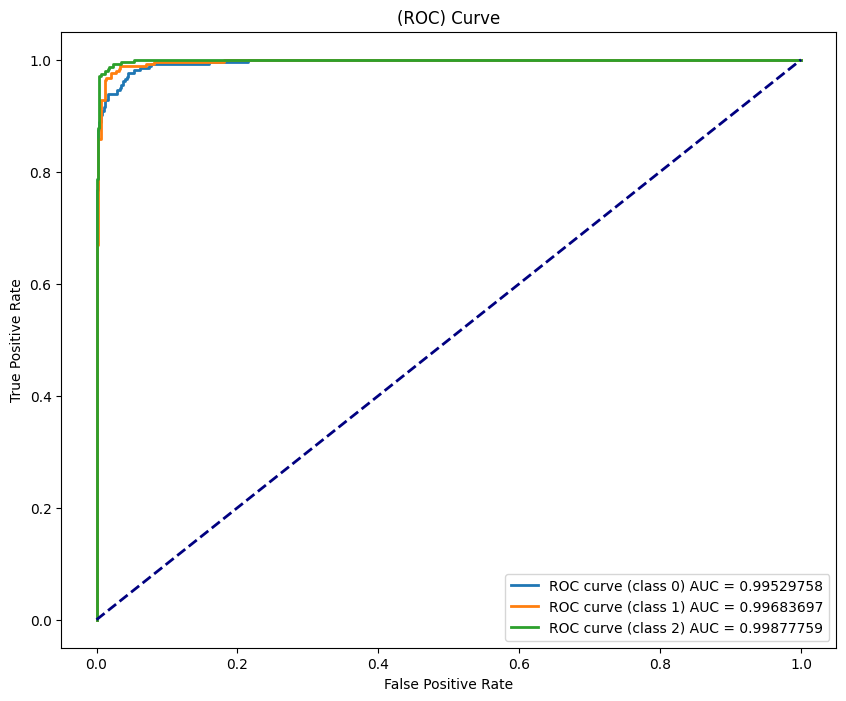

Mean AUC: 0.99697071


In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

y_test_classes = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_probabilities = y_pred

y_test_bin = label_binarize(y_test_classes, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {0}) AUC = {1:0.8f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

mean_auc = np.mean(list(roc_auc.values()))
print(f'Mean AUC: {mean_auc:.8f}')


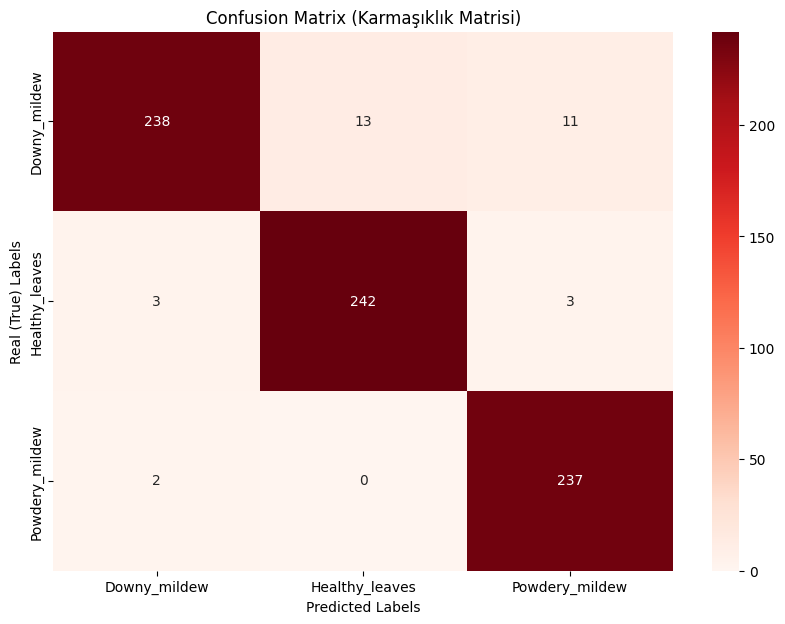

In [34]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
plt.xlabel("Predicted Labels")
plt.ylabel("Real (True) Labels")
plt.show()

# artık transfer öğrenme kısmına geldik


# DenseNet

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 447ms/step - accuracy: 0.7461 - loss: 2.1788 - val_accuracy: 0.9596 - val_loss: 0.1450
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9722 - loss: 0.0655 - val_accuracy: 0.9832 - val_loss: 0.0682
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9875 - loss: 0.0308 - val_accuracy: 0.9663 - val_loss: 0.1231
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9865 - val_loss: 0.0933
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9832 - val_loss: 0.0879
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9984 - loss: 0.0066 - val_accuracy: 0.9832 - val_loss: 0.0483
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 1.0000 - loss: 3.1794e-04 - val_accuracy: 0.9798 - val_loss: 0.0374
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 1.0000 - loss: 6.0174e-05 - val_accurac

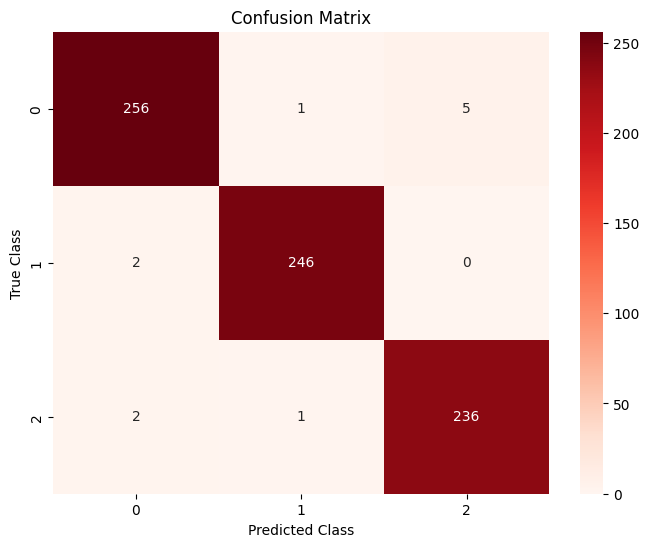

In [27]:

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, f1_score
import numpy as np

input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

model_densenet = DenseNet121(weights='imagenet',
                              input_tensor=input_layer,
                              include_top=False)

dense_last_layer = model_densenet.output
flatten = layers.Flatten()(dense_last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)
model_densenet = models.Model(inputs=input_layer, outputs=output_layer)


for layer in model_densenet.layers[:-1]:
  layer.trainable = False

model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history_densenet = model_densenet.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, f1_score

y_pred_probs = model_densenet.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_classes == y_true_classes)
precision = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['precision']
sensitivity = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['recall']
mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
balanced_acc = balanced_accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

class_report = classification_report(y_true_classes, y_pred_classes)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.8f}")
print("\nClassification Report:\n")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


# InceptionV3

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 42s 313ms/step - accuracy: 0.6779 - loss: 3.6313 - val_accuracy: 0.9495 - val_loss: 0.3013
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9628 - loss: 0.1770 - val_accuracy: 0.9529 - val_loss: 0.3121
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9821 - loss: 0.0556 - val_accuracy: 0.9663 - val_loss: 0.2033
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9895 - loss: 0.0359 - val_accuracy: 0.9865 - val_loss: 0.1264
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9798 - val_loss: 0.1295
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 1.0000 - loss: 3.8839e-04 - val_accuracy: 0.9764 - val_loss: 0.1347
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 1.0000 - loss: 7.3052e-05 - val_accuracy: 0.9832 - val_loss: 0.1256
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 1.0000 - loss: 5.5160e-05 - val_accu

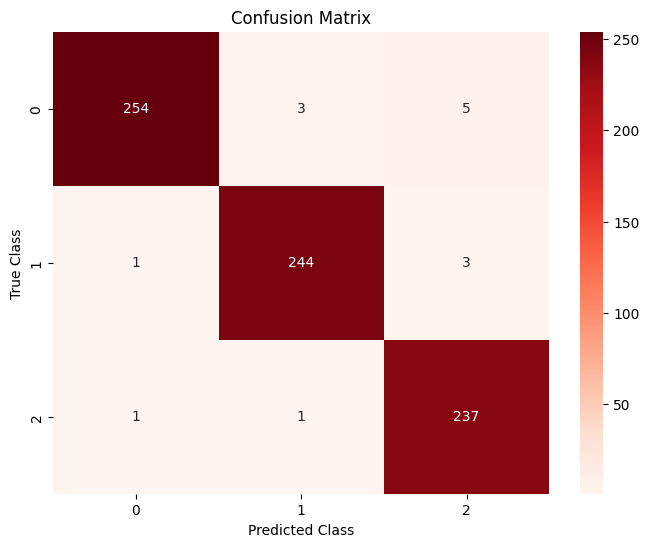

In [28]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

model_inception = InceptionV3(weights='imagenet',
                               input_tensor=input_layer,
                               include_top=False)

inception_last_layer = model_inception.output
flatten = layers.Flatten()(inception_last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_inception = models.Model(inputs=input_layer, outputs=output_layer)

for layer in model_inception.layers[:-1]:
    layer.trainable = False

model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_inception = model_inception.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)

y_pred_probs = model_inception.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_classes == y_true_classes)
precision = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['precision']
sensitivity = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['recall']
mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
balanced_acc = balanced_accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

class_report = classification_report(y_true_classes, y_pred_classes)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.8f}")
print("\nClassification Report:\n")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


# VGG16

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 46s 375ms/step - accuracy: 0.7199 - loss: 0.8630 - val_accuracy: 0.9697 - val_loss: 0.1129
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.9854 - loss: 0.0700 - val_accuracy: 0.9731 - val_loss: 0.0903
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.9928 - loss: 0.0395 - val_accuracy: 0.9798 - val_loss: 0.0751
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9984 - loss: 0.0251 - val_accuracy: 0.9731 - val_loss: 0.0718
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.9832 - val_loss: 0.0760
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.9999 - loss: 0.0125 - val_accuracy: 0.9697 - val_loss: 0.0731
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.9764 - val_loss: 0.0593
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accu

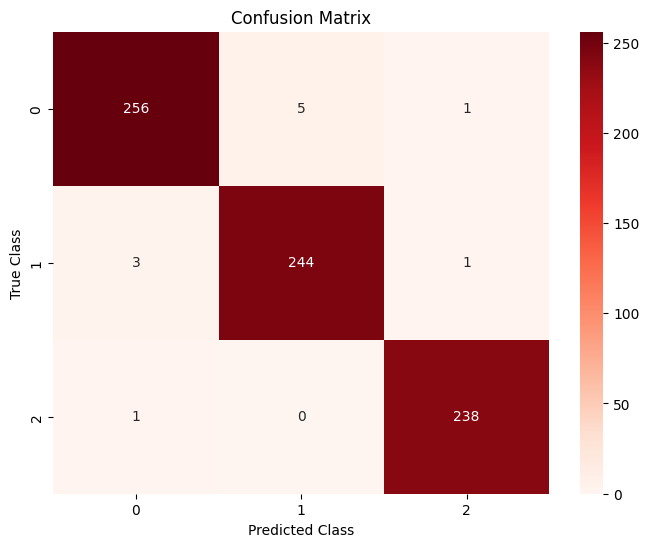

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

model_vgg16 = VGG16(weights='imagenet',
                     input_tensor=input_layer,
                     include_top=False)

vgg16_last_layer = model_vgg16.output
flatten = layers.Flatten()(vgg16_last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_vgg16 = models.Model(inputs=input_layer, outputs=output_layer)

for layer in model_vgg16.layers[:-1]:
    layer.trainable = False

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg16 = model_vgg16.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)

y_pred_probs = model_vgg16.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_classes == y_true_classes)
precision = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['precision']
sensitivity = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['recall']
mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
balanced_acc = balanced_accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

class_report = classification_report(y_true_classes, y_pred_classes)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.8f}")
print("\nClassification Report:\n")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.6761 - loss: 0.9843 - val_accuracy: 0.9461 - val_loss: 0.1813
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - accuracy: 0.9689 - loss: 0.1112 - val_accuracy: 0.9293 - val_loss: 0.2298
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.9836 - loss: 0.0643 - val_accuracy: 0.9697 - val_loss: 0.1242
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9972 - loss: 0.0342 - val_accuracy: 0.9394 - val_loss: 0.1836
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.9938 - loss: 0.0313 - val_accuracy: 0.9764 - val_loss: 0.1037
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.9995 - loss: 0.0152 - val_accuracy: 0.9731 - val_loss: 0.1071
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.9731 - val_loss: 0.1042
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 181m

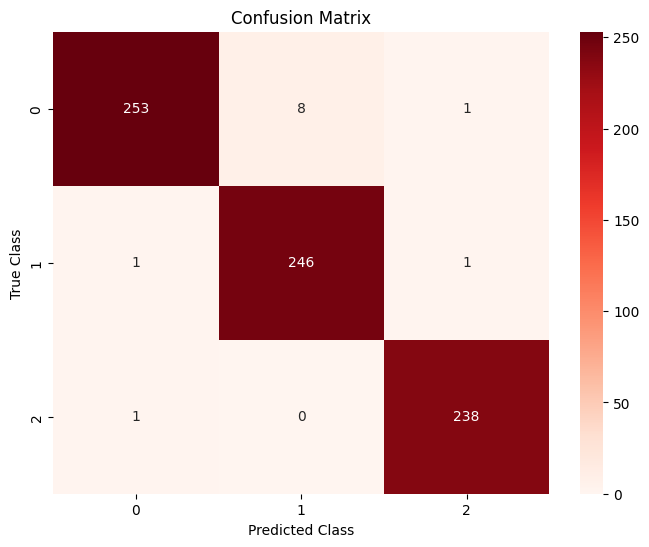

In [24]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

model_vgg19 = VGG19(weights='imagenet',
                     input_tensor=input_layer,
                     include_top=False)

vgg19_last_layer = model_vgg19.output
flatten = layers.Flatten()(vgg19_last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_vgg19 = models.Model(inputs=input_layer, outputs=output_layer)

for layer in model_vgg19.layers[:-1]:
    layer.trainable = False

model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg19 = model_vgg19.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)

y_pred_probs = model_vgg19.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_classes == y_true_classes)
precision = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['precision']
sensitivity = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg']['recall']
mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
balanced_acc = balanced_accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

class_report = classification_report(y_true_classes, y_pred_classes)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.8f}")
print("\nClassification Report:\n")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


# En iyi transfer öğrenme modeli VGG16
# VGG16 roc eğirisi

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step


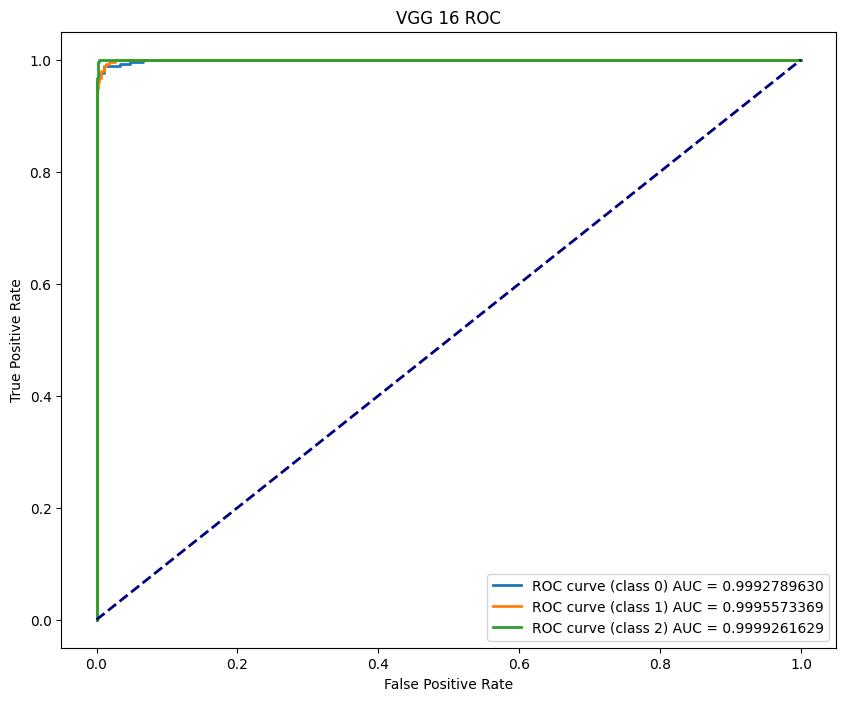

Mean AUC: 0.99958749


In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

y_test_classes = np.argmax(y_test, axis=1)
y_pred = model_vgg16.predict(x_test)
y_pred_probabilities = y_pred


y_test_bin = label_binarize(y_test_classes, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {0}) AUC = {1:0.10f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG 16 ROC')
plt.legend(loc="lower right")
plt.show()

mean_auc = np.mean(list(roc_auc.values()))
print(f'Mean AUC: {mean_auc:.8f}')
